<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Intro to Visualization</div>

# Box Plots and Scatter Plots

Both the graphs that we will look at today share the characteristics of showing the distribution of values very well. 

## Box Plots

Box plots are very useful for certain kinds of data. Sometimes you are doing a comparison between groups but you also care a lot about the distribution of values within that group. Box plots do a great job of summarizing more information than a bar, of course, they are also a little bit more complicated to intrepret. This <a href = 'https://onlinelibrary.wiley.com/doi/abs/10.1111/oik.07356?campaign=woletoc'>video on box plots </a>(sometimes called box-and-whisker plots) provides a quick introduction. The data in the video, on forest trees, is a nice example. It's easy to imagine that the mean might not be a great descriptor of the "typical" age of a forest tree. In any patch of forest, we will have lots of really young individuals, and a few individuals that are much much older than average. So a more descriptive representation is useful. 

So the basic intrepretation is that the whiskers represent the range of the data, and the boxes represent what is known as the inter-quartile distance or interquartile range. Quartiles aren't really that complicated. If you think about lining all the data in order, the first quartile are the first 25% of points in your data set. The second quartile is the second 25%, and so on. So the middle two quartiles represent the middle 50% of the data. In a normal distribution, the values of mean and median should be very similar, and data should be evenly distributed around that central value. So we would see symmetrical box and whiskers. Deviations from normality would appear as an asymmetrical distribution of the box and whiskers.

The other use of boxplots is for evaluating outliers, or 'fliers' in the terminology of matplotlib. Before we said that the whiskers represent the range of the data, but this isn't *quite* true. They represent the range of data that fall within 1.5 times the interquartile distance of the median. Data beyond this range are considered outliers in the context of the dataset, and are represented by individual points. 

There are other options that can be employed in a boxplot as well. A common one is to 'notch' the boxplot to show the 95% confidence interval around the median. 

Much like with the histogram function `plt.boxplot` calculates values based on an array of data that is given as the first argument to the boxplot command, `x`. The <a href = 'https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.boxplot.html'>function definition for boxplot</a> is a bit more complicated than what we have seen before, so we'll do a couple of examples. In the example below we make a simple array of some skewed data where the median is obviously 5, but the values above 5 are farther from the median than the values below five.

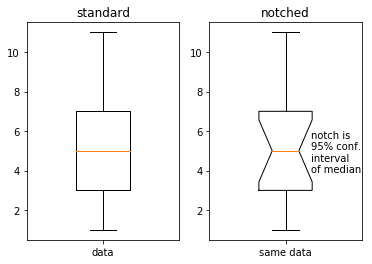

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = [1,2,2,3,3,3,5,5,5,5,7,7,7,9,9,11]  

fig = plt.figure

plt.subplot(1,2,1)
plt.boxplot(data, widths = 0.35, labels = ['data'])         # widths and labels are some simple
plt.title('standard')                                       ## parameters you can control from within .boxplot    


plt.subplot(1,2,2)
plt.boxplot(data, widths = 0.35, labels = ['same data'], notch = True)
plt.title('notched')

plt.text(1.17,3.9, 'notch is\n95% conf.\ninterval\nof median')    # we'll come back to this

plt.show()



To make a boxplot that shows multiple plots, we can simply add a list of arrays in place of a single array. In this case we are going to read in a dataset that has two series of data as a dataframe, and then feed those series in as a list.

We are also going to load some more data onto the plot. In this case, we are going to tell boxplot to calculate the mean as well as the median and show it on the boxplot as well. 

The 'head' of the data we just read in:
    old  reg
0  0.30  0.3
1  0.40  0.5
2  0.50  0.7
3  0.55  0.8
4  0.70  1.0



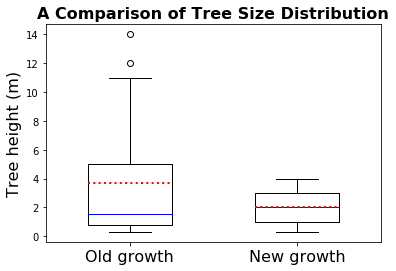

In [3]:
forest = pd.read_csv('data/forest.csv')
print('The \'head\' of the data we just read in:')
print(forest.head())
print()

data = [forest['old'], forest['reg']]           # our Data item is a list of multiple data series from the dataset
xticks_lab = ['Old growth', 'New growth']

median_line = {'color':'blue'}                  # With the boxplot function we need to control properties of the
mean_line = {'color':'red',                     ## subelements using dictionaries. this is a little more challenging
             'linestyle':'dotted',              ## than controlling within the function, and is necessary because each
             'linewidth': 2}                    ## boxplot has many components

fig, ax = plt.subplots()
plt.boxplot(data , widths = 0.5, showmeans = True, meanline = True, meanprops = mean_line, medianprops = median_line)

                                                # if you do showmeans without meanline, get a marker instead of line
                                                # meanprops and medianpros need a dictionary holding style elements, 
                                                ## there are also capprops, whiskerprops, boxprops, flierprops


plt.xticks([1,2], xticks_lab, fontsize = 16) # if we wanted more control over graphical elements, we can skip the
                                             ## label function within the .boxplot function
                                             ## and do it how we did it before 
plt.ylabel('Tree height (m)', fontsize = 16)
plt.title('A Comparison of Tree Size Distribution', fontsize = 16, fontweight = 'bold')
plt.show()

**Question to answer:** Can you interpret the difference between the old growth and new growth forests based on this plot? What do the dots above the old growth box represent?

- The dots represent data outliers/fliers (extreme values that aren't really a good representation of most of the data range)
- Honestly I'm having a little trouble interpreting how the 'head' of the data relates to what I'm seeing on the graph. Is this old growth and new growth measured on the same trees? Or a change in how trees used to grow vs how new trees are growing? 
- 
- 

Your challenge is to create a box plot using the data set boxes.csv. This dataset contains data on boxes from companies that ship products to consumers. The values reported are the difference in centimeters between the longest dimension of the product item shipped and the longest dimension of the box used to ship the product.

Create a boxplot with one box for each company. Make your own decisions regarding labeling and displaying the data, but in the box below the graph, give your reasons for making the decisions that you did.  



   Amazon  Ebay  Etsy  Walmart
0     3.6   4.2   4.3     13.4
1    16.5   8.0   4.7     21.7
2    14.8   4.8   4.7     12.4
3     2.2   6.5   2.7      0.0
4    11.6   6.6   6.4     27.9



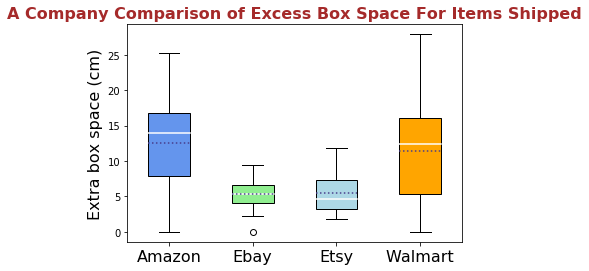

In [40]:
boxes = pd.read_csv('data/boxes.csv')

print(boxes.head())
print()

data = [boxes['Amazon'], boxes['Ebay'], boxes['Etsy'], boxes['Walmart']]        
xticks_lab = ['Amazon', 'Ebay', 'Etsy', 'Walmart']


median_line = {'color':'white',
              'linewidth': 1.5}                  
mean_line = {'color':'darkslateblue',                     
             'linestyle':'dotted',              
             'linewidth': 1.5}                   

fig, ax = plt.subplots()
box = plt.boxplot(data, patch_artist=True, widths = 0.5, showmeans = True, meanline = True, meanprops = mean_line, medianprops = median_line)
plt.xticks([1,2,3,4], xticks_lab, fontsize = 16) 

colors = ['cornflowerblue', 'lightgreen', 'lightblue', 'orange']
for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
                                           
                                        
plt.ylabel('Extra box space (cm)', fontsize = 16)
plt.title('A Company Comparison of Excess Box Space For Items Shipped', fontsize = 16, fontweight = 'bold',  color = 'brown')
plt.show()


**Describe your graph:** Why did you make the decisions that you made?

- I mostly followed the same format as the original graph, but made necessary changes to support more data
- After I got the plot set up to accomodate the extra data, I added a small 'for' loop to make the colors a little more eyecatching and adjusted the rest of the colors accordingly to stand out. 
- 
- 

## Scatter Plots

We have already worked with scatter plots in the introduction. Scatterplots are graphed by designating x and y values. The base form is very simple: `plt.scatter(x,y)` . On top of that we can add all kinds of detail to change colors, axes, and etc. just as we have seen with other graph types. Many of these options can be managed at the level of figure and axes, others can be found in the <a href = 'https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html'>function definition for scatterplots</a>, such as the value `s`, which controls the size of the dots. 

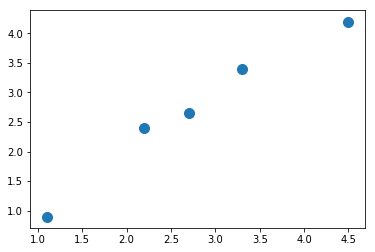

In [41]:
x = [1.1,2.2,2.7,3.3,4.5]
y = [0.9,2.4,2.65,3.4,4.2]

plt.scatter(x,y,s = 100)

plt.show()



Since we've already worked on scatterplots a bit, we will focus on annotating graphs in different ways. The first way we can annotate a graph is to do as I did above with the boxplot example. `plt.text` is a simple way to add text to a graph. The basic usage requires three arguments, the x and y positions of the text, and the text itself. Below for the left figure I take the value for x and y from the 4th data point in the sequence. We can see that this results in the text overlapping the data point. The figure on the right represents the same thing but I have shifted the position of the text just a bit and added some formatting. 

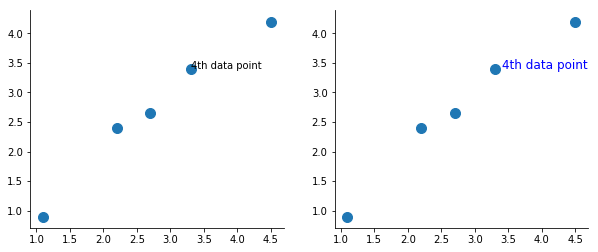

In [42]:
fig = plt.figure( figsize = (10,4))

ax1 = plt.subplot(1,2,1)
plt.scatter(x,y,s = 100)
plt.text(x[3], y[3],'4th data point')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = plt.subplot(1,2,2)
plt.scatter(x,y,s = 100)
plt.text(x[3] + 0.1, y[3],'4th data point', fontsize = 12, color = 'blue')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()



## Adding dimensions with annotations

Another way that we can approach graph annotation is to think about how we can use annotations to add more dimensions to our graph. 

So how can we add higher dimensions? Flat graphs on paper and screens show us data in two dimensions. But there are tricks to adding dimensionality, and scatterplots are a great place to show how we can do this. 

One way we can add dimensionality is to use color to add category data to a 2D figure, so for a scatterplot we would have two continuous variables, x and y, and another categorical value. We actually already did this once! Go back to the section **Dictionaries for data categories** in the notebook **Review of data structures and plot basics** to see how we can use another column within our data set, and a dictionary of color values, to assign different colors based on different variables. 

Another situation might be if we had different data series for different categories. In this case we can just plot two scatter plots within the same figure and axes. This produces the exact same graph as what we made in the review notebook. 

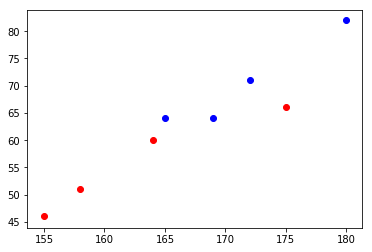

In [43]:
Male_heights = [165,180,169,172]
Male_weights = [64,82,64,71]
Female_heights = [164,158,175,155]
Female_weights = [60,51,66,46]

fig = plt.figure()
ax = plt.axes()

plt.scatter(Male_heights,Male_weights, color = 'blue')
plt.scatter(Female_heights, Female_weights, color = 'red')

plt.show()

Another way that we might want to handle dimensionality is to use a third variable that isn't categorical but that is actually continuous. One technique to graphing a third variable onto a data set is to use that variable to define the size of the markers. To do this, instead of assigning `size` in the scatterplot function to a fixed value, we can assign another data series to that value, like this:

     country  per_capita  life_expec  population
0        USA       65111        78.9   330000000
1  Australia       53825        82.8    26000000
2         UK       41030        81.1    68000000
3      China       10098        82.0  1394000000
4      India        2171        68.6  1326000000
5     Mexico       10118        74.9   129000000
6     Canada       46212        75.9    38000000


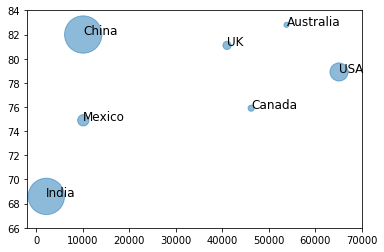

In [44]:
country = pd.read_csv('data/country.csv')
country.set_index('country')

print(country)

x = country['per_capita']                      # This data set contains IMF 2019 percapita income data,
y = country['life_expec']                      ## population size, life expectancy, and the country name
z = country['population']                     
c = country['country']

fig = plt.figure()
ax = plt.axes()

plt.scatter(x,y, s = z/1000000, alpha =0.5)     # note that I get the circle size by dividing the population size
                                                ## alpha sets the value for the transparency of the circles
plt.ylim(66,84)                                 
plt.xlim(-2000,70000)                           # ylim and xlim set the range of the axes, try commenting out these
                                                ## lines to see what happens if I didn't adjust these manually

for i in range(len(x)):                         # I used a for loop to walk through the list of countries and attach
    plt.text(x[i],y[i],c[i], fontsize = 12)     ## the name of each country to the point is corresponds to.

plt.show()

This isn't the most beautiful graph, but hopefully it's enough to show you the potential here!

Finally, another way we can go about annotating a plot is to include data analysis such as regression or correlation lines. The trick to this is that first we have to create the regression line, capture the slope and intercept value of that line, and then we have to plot it. Work slowly and steadily through the data below. 


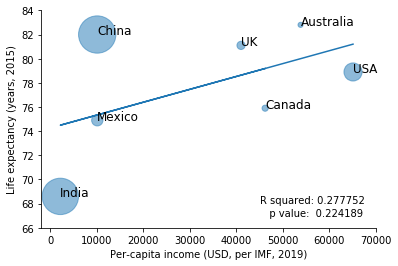

In [45]:
from scipy import stats                         # note that we need to import a new package here, for doing stats


fig = plt.figure()
ax = plt.axes()

plt.scatter(x,y, s = z/1000000, alpha =0.5)     # same as above
                                                
plt.ylim(66,84)                                 
plt.xlim(-2000,70000)                           # same as above

for i in range(len(x)):                         # same as above
    plt.text(x[i],y[i],c[i], fontsize = 12)    



slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)   # To get the slope and intercept of the regression
line = slope*x + intercept                                            ## line, we run a linear regression on x and y
                                                                      ## the first line here just takes the output of 
                                                                      ## that anlysis and stores it in some variables
                                                                      ## the second line takes our x values and creates
                                                                      ## a set of y values for the regression line using
                                                                      ## the equation y = mx + b for a line

plt.plot(x, line)                                # to make a line, we just plot a line graph over the range of x!!!

plt.text(45000,68,('R squared: %f'% r_value**2))  # this is optional, but we can include the other values we got from the
plt.text(45000,67,('   p value:  %f'% p_value))   ## regression analysis if we want

ax.spines['right'].set_visible(False)             # I just hate graphs that look all boxed in
ax.spines['top'].set_visible(False)

plt.ylabel('Life expectancy (years, 2015)')
plt.xlabel('Per-capita income (USD, per IMF, 2019)')

plt.show()

This is a pretty cool graph, no? Again, of course we could prettify this various ways and make it look nicer, adjust the size of the graph and the size of the circles to really fill the space efficiently, and etc. But this is a good place to start. 


**Assingment** let's do something more open-ended. I grabbed this dataset of the <a href = 'https://gist.github.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea'>top-grossing movies between 2007 and 2011</a> and added it to the data folder as movies.csv. I'd like you to do two things with this. There are several categorical variables and several continuous variables in this data set. **Part 1** pick a category variable in the data and make a box plot of whatever you think is the most interesting continuous data that varies across those categories. There should be as many boxes as categories. Make sure to interpret the resulting figure. **Part 2** pick three continuous variables and make a scatter plot with variable sized markers. Identify an interesting category and indicate it by using different colored dots. Draw a regression line describing the relationship between x and y. Label some interesting individual movies that stand out from the rest of your data in one way or another. 

Text(0, 0.5, 'Profitability')

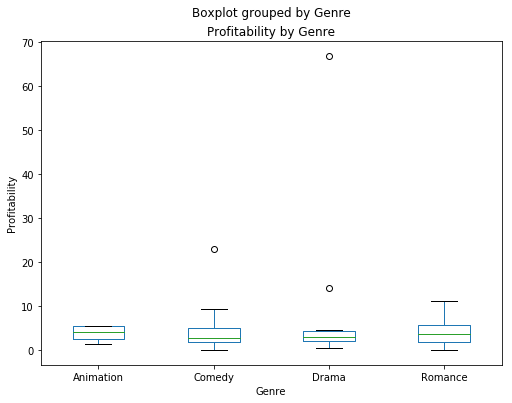

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv('data/movies.csv')

#print(movies.head())
#print()  
#movies.groupby(by='Genre')['Profitability']



df1 = movie[['Genre', 'Profitability']]

df_new = df1.set_index('Genre')
df_new2 = df_new.rename(index={'Comdy': 'Comedy','comedy':'Comedy','romance':'Romance','Romence':'Romance'})
df_new2 = df_new2.sort_index()
df_new2 = df_new2.drop(['Action', 'Fantasy'])
#df_new2transposed = df_new2.T # or df1.transpose()
#df_new2transposed = df_new2transposed.groupby(level=0, axis=1).aggregate(lambda tdf: tdf.tolist())
#df3 = df_new2transposed
               

fig, ax = plt.subplots(figsize=(8,6))
plt.suptitle('')
df_new2.boxplot(column=['Profitability'],by='Genre',  ax=ax, grid=False)
ymax=30

ax.set_title('Profitability by Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Profitability')




**Interpretation:** Provide your intrepretation of your figures here.

- I made a real mess in extracting this data. I eventually turned it into a dataframe, which then wouldn't work with plt.boxplot, so I had to try something else. The something else was difficult to format and doesn't look nice. I took so long on this that I don't have more time to put toward the scatter plot! I want to try this again from scratch!
- 
- 

![Alt text that will appear on mouseover](images/TJU_logo_dummy_image.png "Jefferson logo")